In [14]:
%matplotlib inline

import numpy as np
import pylab as pl
import matplotlib
import pp
import time
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.stats import lognorm

import cksrad.simulations
import cksrad.fitting

nsim = 100
npl = 65000

matplotlib.rcParams['font.size'] = 24
matplotlib.rcParams['figure.figsize'] = (12,8)

reload(cksrad.simulations)


<module 'cksrad.simulations' from '/Users/bfulton/code/cksrad/cksrad/simulations.pyc'>

In [15]:
try:
    server.destroy()
except:
    pass
# server = pp.Server(ncpus=0, secret='gj3470b', ppservers=("ian.ifa.hawaii.edu",
#                                                          "catalina.ifa.hawaii.edu",
#                                                          "firefly.ifa.hawaii.edu",
#                                                          "ernie.ifa.hawaii.edu",
#                                                          "morgan.ifa.hawaii.edu",
#                                                          "bert.ifa.hawaii.edu",
#                                                          "cadence.caltech.edu"))
server = pp.Server(ncpus=20)

time.sleep(5)
print server.get_active_nodes(), np.sum(server.get_active_nodes().values())

{'local': 20} 20


In [16]:
jobs = []
for i in range(nsim):
    jobs.append(server.submit(cksrad.simulations.simulated_survey, args=(npl,)))
    #out = cksrad.simulations.simulated_survey(1000)

true_ratios = []
final_ratios = []
whistograms = []
rhistograms = []
ndetections = []
det_histograms = []
dfs = []
outdicts = []
for j in jobs:
    out = j()

    true_ratios.append(out['true_ratio'])
    final_ratios.append(out['final_ratio'])
    whistograms.append(out['weighted_hist_norm'])
    rhistograms.append(out['observed_hist_norm'])
    ndetections.append(out['n_detections'])
    dfs.append(out['sim_data'])
    det_histograms.append(out['observed_hist'])
    outdicts.append(out)

server.destroy()

/Users/bfulton/code/cksrad/cksrad/completeness.py:54: RuntimeWarning: invalid value encountered in sqrt
  x = 1/np.sqrt(durations)
/Users/bfulton/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/bfulton/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/bfulton/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1735: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/Users/bfulton/code/cksrad/cksrad/completeness.py:54: RuntimeWarning: invalid value encountered in sqrt
  x = 1/np.sqrt(durations)
/Users/bfulton/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Us

In [17]:
hkx = np.logspace(np.log10(0.5), np.log10(8), 1000)

# Make some fake planets
r1frac = 0.5
r2frac = 1-r1frac
nstars = 5e4

# radii limits to define two peaks
r1, r2, r3, r4 = 1.1, 1.7, 2.0, 3.0

# broad distributions
# simulated_periods = np.random.lognormal(3.5, 1.0, size=int(np.round(npl*r1frac)))
# simulated_periods = np.append(simulated_periods, np.random.lognormal(2.5, 0.9, size=int(np.round(npl*r2frac))))
# simulated_radii = np.random.lognormal(1.05, 0.32, size=int(np.round(npl*r1frac)))
# simulated_radii = np.append(simulated_radii, np.random.lognormal(0.0, 0.20, size=int(np.round(npl*r2frac))))
# ly1 = cksrad.fitting.lognorm(hkx, 1.0, 2.858, 0.32)
# ly2 = cksrad.fitting.lognorm(hkx, 1.3, 0.819, 0.28)


# narrow distributions
# simulated_periods = np.random.lognormal(3.5, 0.7, size=int(np.round(npl*r1frac)))
# simulated_periods = np.append(simulated_periods, np.random.lognormal(2.5, 0.9, size=int(np.round(npl*r2frac))))
# simulated_radii = np.random.lognormal(0.867, 0.17, size=int(np.round(npl*r1frac)))
# simulated_radii = np.append(simulated_radii, np.random.lognormal(0.26, 0.12, size=int(np.round(npl*r2frac))))
ly1 = cksrad.fitting.lognorm(hkx, 1.0, 2.38, 0.15)
ly2 = cksrad.fitting.lognorm(hkx, 1.41, 1.30, 0.09)
ly1 = cksrad.fitting.gauss(np.log10(hkx), 1.0, np.log10(2.38), np.log10(1.185))
ly2 = cksrad.fitting.gauss(np.log10(hkx), 1.41, np.log10(1.30), np.log10(1.13))


# uniform distributions
simulated_periods = 10**np.random.uniform(np.log(1), np.log(200), size=int(npl))
simulated_radii = 10**(np.random.uniform(np.log(0.5), np.log(8), size=int(npl)))



random_order = np.array(range(npl))
np.random.shuffle(random_order)
simulated_periods = simulated_periods[random_order]
simulated_radii = simulated_radii[random_order]

Redges = np.logspace(np.log10(0.5), np.log10(20), 36)
true_dist,_ = np.histogram(simulated_radii, bins=Redges)
true_dist = np.array(true_dist, dtype=float) / nstars

ly = ly1 + ly2

print np.trapz(ly1, np.log10(hkx)), np.trapz(ly2, np.log10(hkx))


0.184784501337 0.187597577365


(35, 100)
(35,) (35,)
array([ 2.81570765,  2.49756761,  2.30114599,  2.5389933 ,  2.34539564,
        2.0856459 ,  1.92438544,  1.94995261,  1.88536633,  1.45970263,
        1.65253424,  1.8102754 ,  1.38489473,  1.50448697,  1.3923987 ,
        1.58201561,  1.47604433,  1.57615124,  1.25218412,  1.48151002,
        1.47226211,  1.45848035,  1.62620336,  1.45336104,  1.49927148,
        1.51589925,  1.33522687,  1.43910017,  1.45971532,  1.51720192,
        1.56983652,  1.36153125,  1.34642358,  1.44756085,  1.4414092 ]) 1.61296679206
0.28547921959


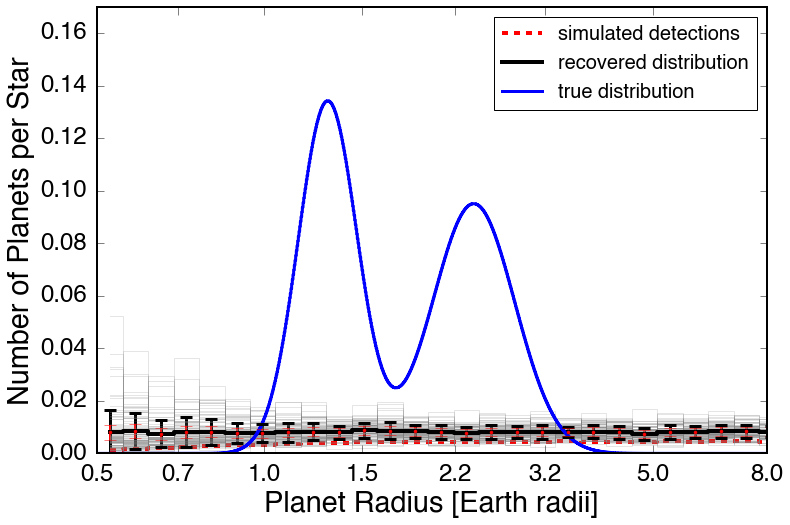

In [18]:
rcen = out['radius_bin_centers']

hstack = np.vstack(whistograms).transpose()
rstack = np.vstack(det_histograms).transpose()
med_det_norm = np.vstack(rhistograms).transpose().mean(axis=1)
print hstack.shape

rerr = hstack.std(axis=1)
med_hist = hstack.mean(axis=1)
med_det = rstack.mean(axis=1)
print med_hist.shape, rerr.shape


#print np.trapz(med_hist, rcen), np.trapz(ly, hkx)
tly = ly / (np.trapz(ly, hkx) / np.trapz(med_hist, rcen))


pl.step(rcen, med_det_norm, lw=4, color='r', where='mid', linestyle='--', 
        label='simulated detections')
pl.step(rcen, hstack, lw=1, color='0.5', where='mid', linestyle='-', alpha=0.2)
pl.step(rcen, med_hist, lw=4, color='k', where='mid', linestyle='-', 
            label='recovered distribution')
# pl.step(rcen, true_dist, lw=3, color='b', where='mid', linestyle='-', 
#              label='true distribution')
pl.step(hkx, tly, lw=3, color='b', where='mid', linestyle='-', 
            label='true distribution')

(_, caps, _) = pl.errorbar(rcen, med_hist, yerr=rerr, fmt='k.', lw=3, capsize=6)
for cap in caps:
    cap.set_markeredgewidth(3)
#pl.errorbar(Rcen, whistn, yerr=werr, fmt='k.')

sfac = 1/out['sim_data'].tr_prob.mean()
poisson_errors = np.sqrt(med_det) / 5e4 * sfac
poisson_errors *= med_hist/med_det_norm
err_ratio = poisson_errors/rerr
print repr(1/err_ratio), 1/np.nanmean(err_ratio)
pl.errorbar(rcen, med_hist, yerr=poisson_errors, fmt='r.', lw=2, capsize=6)


# pl.axvline(1.1)
# pl.axvline(1.7)
# pl.axvline(2.0)
# pl.axvline(3.0)
# print np.log10(3.) - np.log10(2)
# print np.log10(1.7) - np.log10(1.1)

pl.xlim(0.5,6)
pl.ylim(0,0.17)
pl.semilogx()
ax = pl.gca()
ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.1f'))

pl.xticks(np.array([0.5,0.7,1.0,1.5,2.2,3.2,5,8.0]))

pl.ylabel('Number of Planets per Star')
pl.xlabel('Planet Radius [Earth radii]')

pl.legend(loc='upper right')

print np.sum(med_hist)

pl.grid(False)

#pl.savefig('/Users/bfulton/Dropbox/plots/simulated_surveys_hist.pdf')


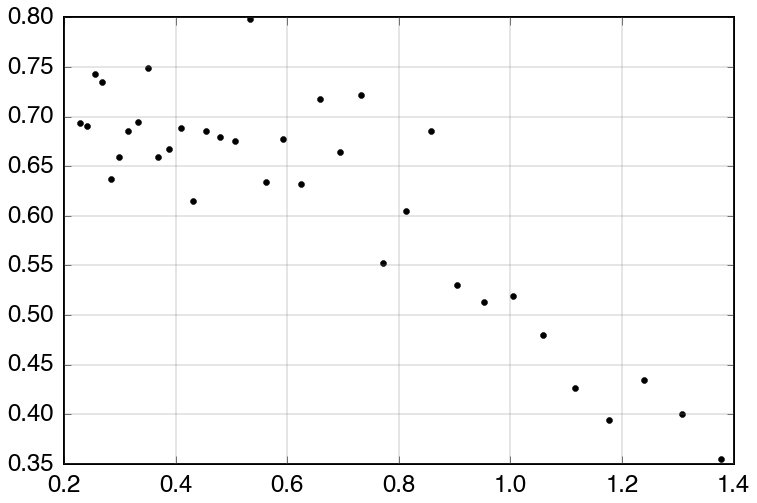

In [19]:
pl.plot(1/np.sqrt(rcen), err_ratio, 'ko')

In [20]:
print np.mean(ndetections), np.std(ndetections), npl / (np.mean(ndetections)/899)
print np.mean(final_ratios), np.std(final_ratios), np.std(final_ratios)/np.mean(final_ratios)
print np.mean(true_ratios), np.std(true_ratios)
print 1.1 * 0.06

1273.53 59.1323016633 45884.2744183
0.912247202111 0.178005251521 0.195128306351
0.888488679785 0.023430590927
0.066


0.466753482937


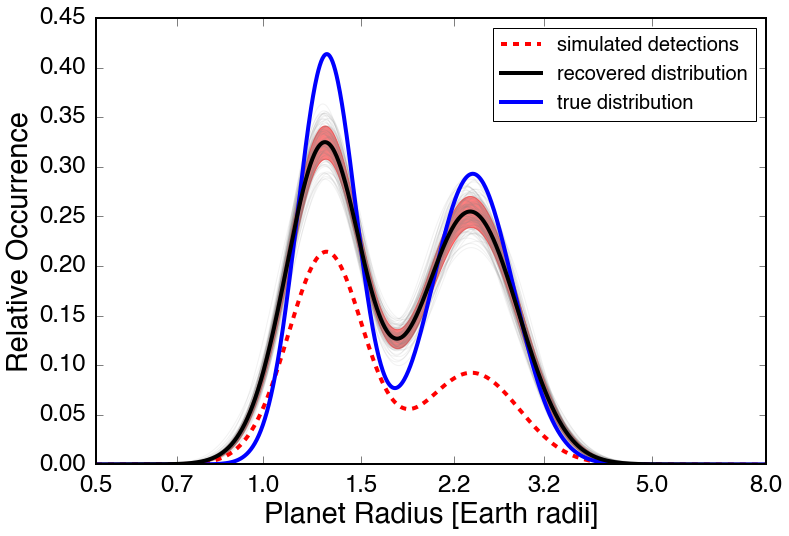

In [9]:

all_wkde = []
all_kde = []
for o in outdicts:
    #ky = o['kde_y']
    #ky *= 5e4
    
    wky = InterpolatedUnivariateSpline(o['wkde_x'], o['wkde_y'], k=1)(hkx) / npl
    ky = InterpolatedUnivariateSpline(o['kde_x'], o['kde_y'], k=1)(hkx) / npl * sfac
    all_wkde.append(wky)
    all_kde.append(ky)
        
    pl.plot(hkx, wky, color='0.5', alpha=0.1)
    
all_kde = np.vstack(all_kde)
med_kde = np.nanmean(all_kde, axis=0)
med_wkde = np.nanmean(all_wkde, axis=0)
kde_std = np.nanstd(all_wkde, axis=0)
kde_err1 = med_wkde + kde_std
kde_err2 = med_wkde - kde_std

tky = InterpolatedUnivariateSpline(o['true_kde_x'], o['true_kde_y'], k=1)(hkx) / npl

dky = InterpolatedUnivariateSpline(o['true_kde_x'], o['true_kde_y'], k=1)(hkx) / npl

kly = ly *  (np.trapz(med_wkde, hkx)/ np.trapz(ly, hkx))

pl.plot(hkx, med_kde, 'r--', lw=4, label='simulated detections')
pl.plot(hkx, med_wkde, 'k', lw=4, label='recovered distribution', zorder=3)
#pl.step(rcen, true_dist*3, 'b-', where='mid', lw=4, label='true distribution', zorder=2)
pl.plot(hkx, kly, 'b-' , lw=4, label='true distribution', zorder=2)
pl.fill_between(hkx, kde_err2, kde_err1, color='r', alpha=0.5, zorder=2)
    
pl.xlim(0.5,6)
pl.ylim(0,0.45)
pl.semilogx()
ax = pl.gca()
ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.1f'))

pl.xticks(np.array([0.5,0.7,1.0,1.5,2.2,3.2,5,8.0]))

pl.ylabel('Relative Occurrence')
pl.xlabel('Planet Radius [Earth radii]')

pl.legend(loc='upper right')

pl.grid(False)

#pl.savefig('/Users/bfulton/Dropbox/plots/simulated_surveys_kde.pdf')

np.savetxt('/Users/bfulton/code/cksrad/data/kde_uncertainty.txt', np.transpose((hkx, med_wkde, kde_std)))

print np.trapz(med_wkde, hkx)
